In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle


In [68]:
df = pd.read_csv('../Get_Data_BTC/BTC_Daily_ohlc.csv')
start_date = "2023-01-01"
mask = (df["date"] > start_date) 
df = df.loc[mask]

In [69]:
def draw_list_creation(time_step = 5, forecast_threshold = 5) :
    list_of_draw_low = []
    list_of_draw_high = []
    list_of_interval = []
    previous_low = (np.argmin(df['low'].values[0:time_step]) ,min(df['low'].values[0:time_step]))
    previous_high = (np.argmax(df['high'].values[0:time_step]) ,max(df['high'].values[0:time_step]))

    for i in range(time_step, len(df["date"]) -1 - time_step, time_step) :
        # print(i)
        low = (np.argmin(df['low'].values[i:i+time_step]) + i ,min(df['low'].values[i:i+time_step]))
        high = (np.argmax(df['high'].values[i:i+time_step]) + i ,max(df['high'].values[i:i+time_step]))
        interval = (i - time_step, i + time_step + forecast_threshold)
        list_of_interval.append(interval)
        list_of_draw_low.append((previous_low, low))
        list_of_draw_high.append((previous_high, high))
        previous_low = low
        previous_high = high
    
    return list_of_draw_low, list_of_draw_high, list_of_interval



In [70]:
def candleplot(df, list_of_draw_low, list_of_draw_high, list_of_interval,  x_min = 0, x_max = len(df) , filename = "plot_BTC"):
    ## Figure params
    plt.figure(dpi = 200)
    plt.ylabel('price (dollars)')
    plt.title('Bitcoin')
    plt.xlabel('days')
    plt.grid(True)

    ## Import ohlc 
    opens = df['open'].values[x_min:x_max]
    truth = df['close'].values[x_min:x_max]
    highs = df['high'].values[x_min:x_max]
    lows = df['low'].values[x_min:x_max]

    ## Draw candles
    height = truth - opens
    bottom = np.where(height > 0, opens, truth + abs(height))
    color = np.where(height > 0, 'g', 'r')
    plt.bar(range(x_min,len(truth) + x_min), height, bottom=bottom, color=color, align='center')
    plt.vlines(range(x_min, x_min + len(highs)), ymin=lows, ymax=highs, color=color, linewidth=1)


    for i,elt in enumerate(list_of_interval) :
        if elt[0] == x_min :
            index = i 
            break
        elif elt[0] > x_min :
            index = i - 1
            break

    for elt in list_of_draw_low[index:index + 1] :
        x1 = elt[0][0]
        y1 = elt[0][1]
        x2 = elt[1][0]
        y2 = elt[1][1]
        
        plt.plot([x1,x2],[y1,y2], linewidth=1)

    for elt in list_of_draw_high[index:index + 1] :
        x1 = elt[0][0]
        y1 = elt[0][1]
        x2 = elt[1][0]
        y2 = elt[1][1]
        plt.plot([x1,x2],[y1,y2], linewidth=1)      


    plt.savefig(f'./plot/{filename}')

            

In [71]:
def save_lists_with_pickle(list_of_draw_low, list_of_draw_high, list_of_interval, filename):
    with open(filename, 'wb') as file:
        pickle.dump(list_of_draw_low, file)
        pickle.dump(list_of_draw_high, file)
        pickle.dump(list_of_interval, file)
    print("List successfully saved in the file : ", filename)



In [72]:
list_of_draw_low_5, list_of_draw_high_5, list_of_interval_5 = draw_list_creation(time_step=5, forecast_threshold=5)

print(list_of_interval_5)
print(list_of_draw_low_5)
print(list_of_draw_high_5)


[(0, 15), (5, 20), (10, 25), (15, 30), (20, 35), (25, 40), (30, 45), (35, 50), (40, 55), (45, 60), (50, 65), (55, 70), (60, 75), (65, 80), (70, 85), (75, 90), (80, 95), (85, 100), (90, 105), (95, 110), (100, 115), (105, 120), (110, 125), (115, 130), (120, 135), (125, 140), (130, 145), (135, 150), (140, 155), (145, 160), (150, 165), (155, 170), (160, 175), (165, 180), (170, 185), (175, 190), (180, 195), (185, 200), (190, 205), (195, 210), (200, 215), (205, 220), (210, 225), (215, 230), (220, 235), (225, 240), (230, 245), (235, 250), (240, 255), (245, 260), (250, 265), (255, 270), (260, 275), (265, 280), (270, 285), (275, 290), (280, 295), (285, 300), (290, 305), (295, 310), (300, 315), (305, 320), (310, 325), (315, 330), (320, 335), (325, 340), (330, 345), (335, 350), (340, 355), (345, 360), (350, 365), (355, 370), (360, 375), (365, 380), (370, 385), (375, 390), (380, 395), (385, 400), (390, 405), (395, 410), (400, 415)]
[((0, 16498.995356801075), (5, 16678.91686999694)), ((5, 16678.916

In [73]:
filename = "lists_data_5.pickle" 
save_lists_with_pickle(list_of_draw_low_5, list_of_draw_high_5, list_of_interval_5, filename)

List successfully saved in the file :  lists_data_5.pickle


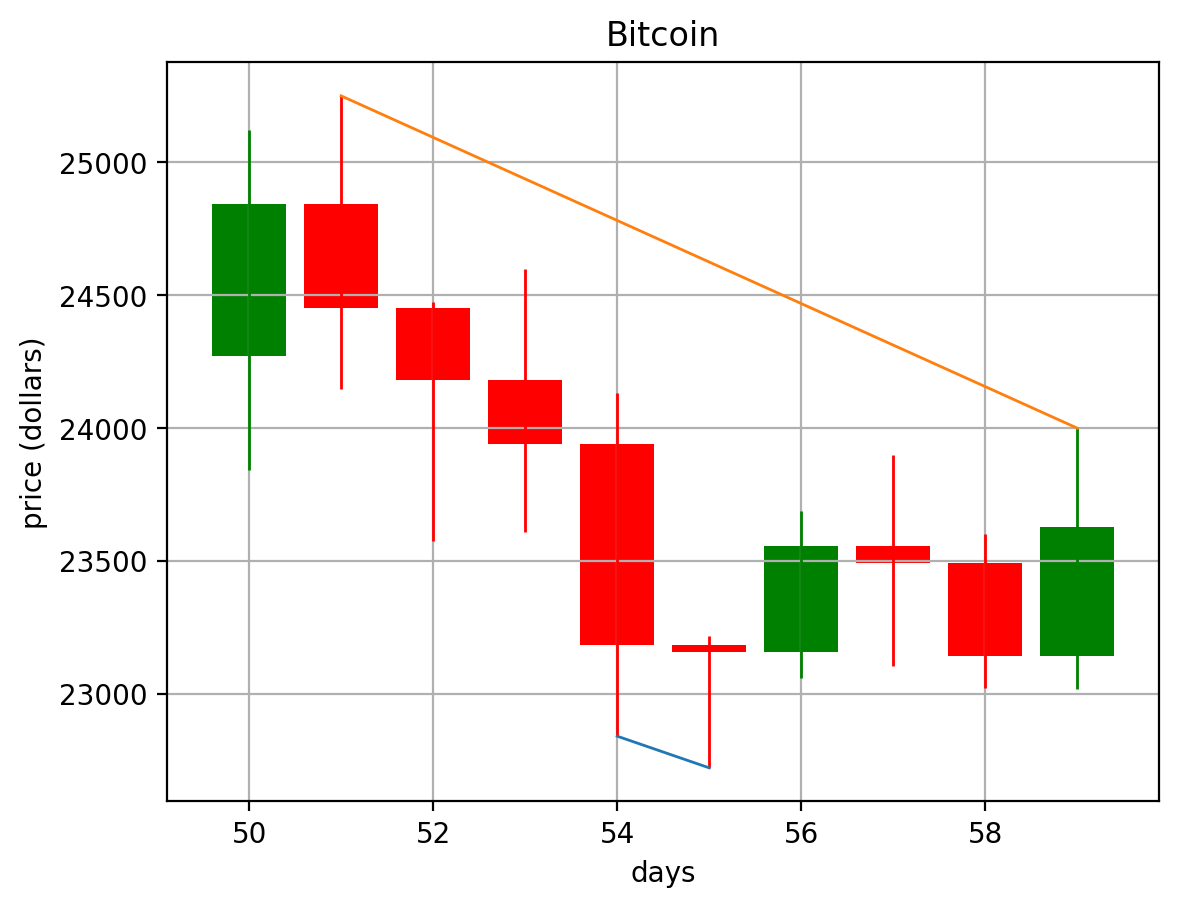

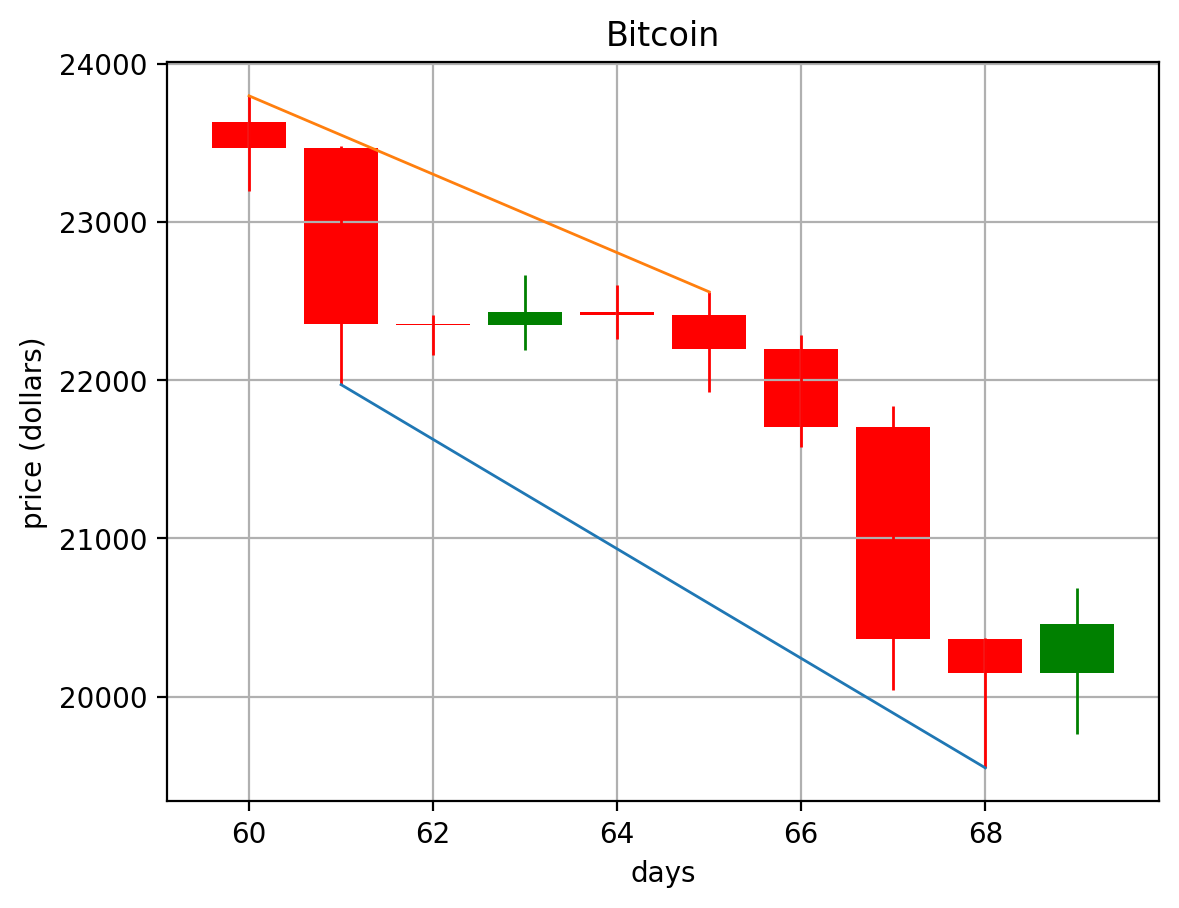

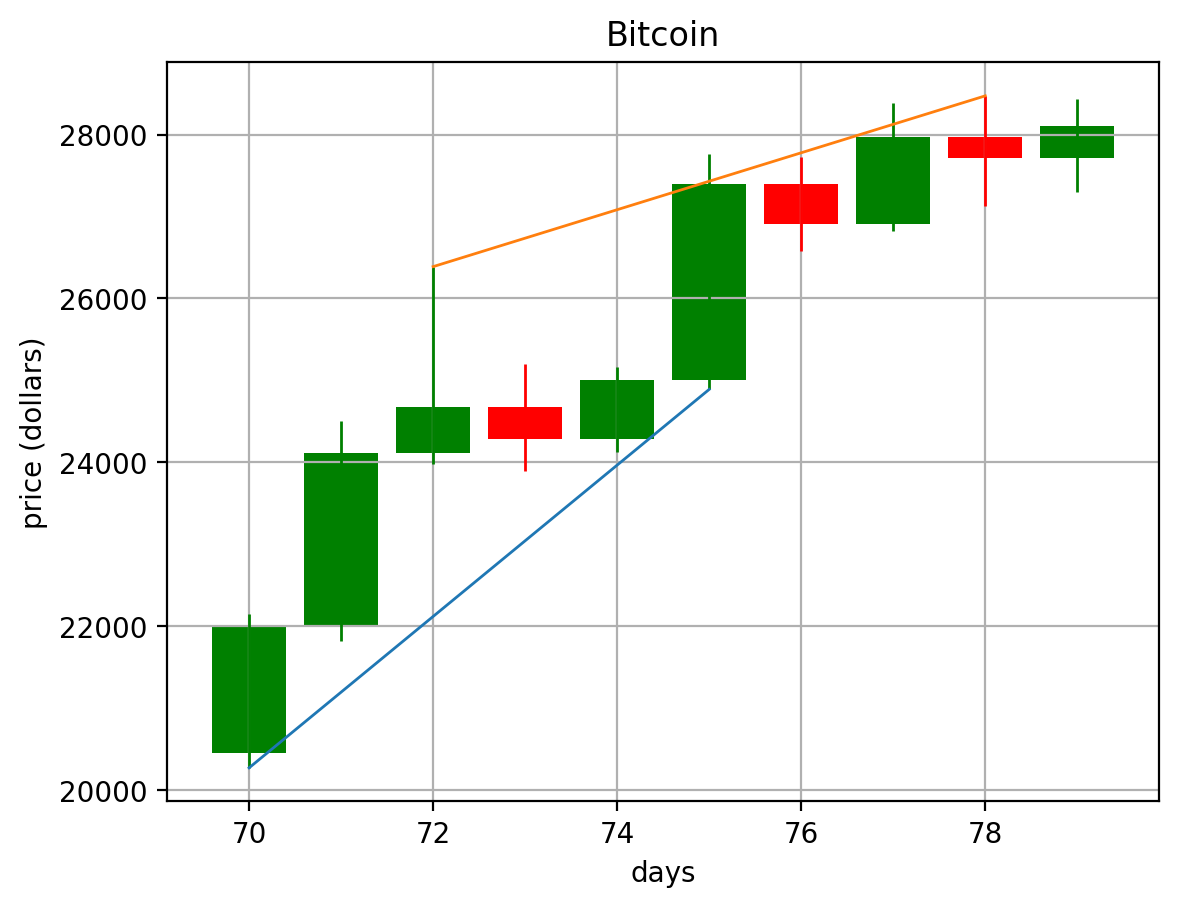

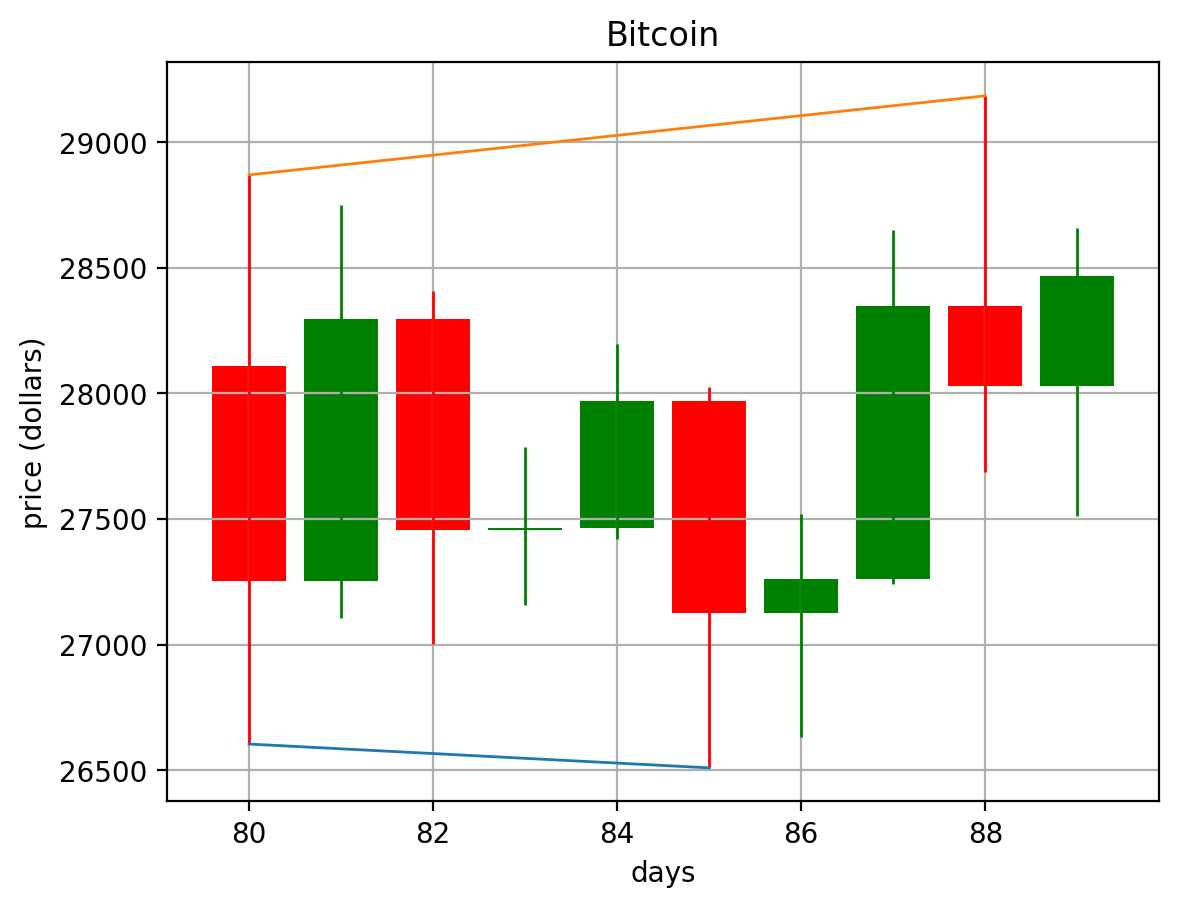

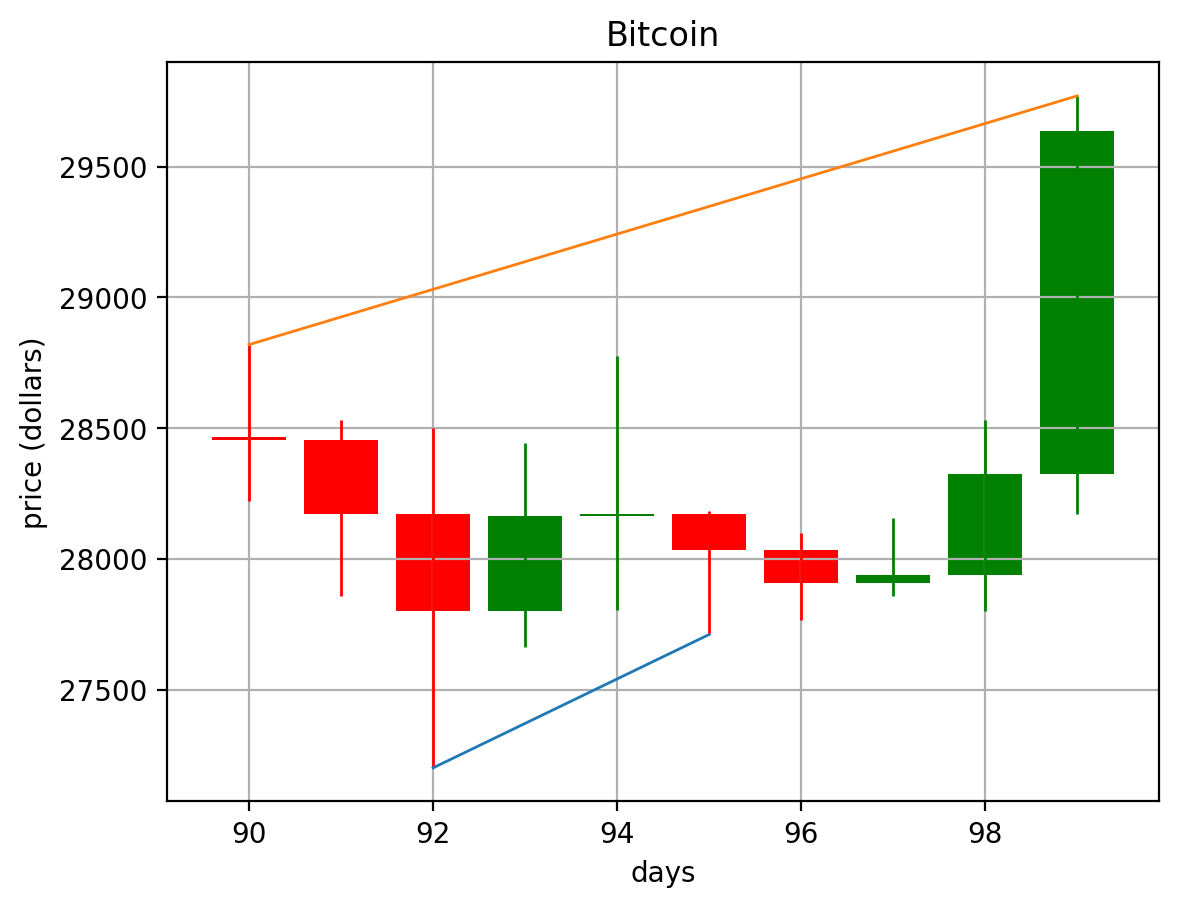

In [74]:
candleplot(df, list_of_draw_low_5, list_of_draw_high_5, list_of_interval_5, x_min = 50 , x_max = 60, filename= "test_50-60-0")
candleplot(df, list_of_draw_low_5, list_of_draw_high_5,list_of_interval_5, x_min = 60 , x_max = 70, filename= "test_60-70-0")
candleplot(df, list_of_draw_low_5, list_of_draw_high_5,list_of_interval_5, x_min = 70 , x_max = 80, filename= "test_70-80-0")
candleplot(df, list_of_draw_low_5, list_of_draw_high_5,list_of_interval_5, x_min = 80 , x_max = 90, filename= "test_80-90-0")
candleplot(df, list_of_draw_low_5, list_of_draw_high_5,list_of_interval_5, x_min = 90 , x_max = 100, filename= "test_90-100-0")

In [75]:
list_of_draw_low_20, list_of_draw_high_20, list_of_interval_20 = draw_list_creation(time_step=20, forecast_threshold=0)

print(list_of_interval_20)
print(list_of_draw_low_20)
print(list_of_draw_high_20)

[(0, 40), (20, 60), (40, 80), (60, 100), (80, 120), (100, 140), (120, 160), (140, 180), (160, 200), (180, 220), (200, 240), (220, 260), (240, 280), (260, 300), (280, 320), (300, 340), (320, 360), (340, 380), (360, 400)]
[((0, 16498.995356801075), (39, 21688.066960518427)), ((39, 21688.066960518427), (43, 21351.231064033906)), ((43, 21351.231064033906), (68, 19549.24001510092)), ((68, 19549.24001510092), (85, 26508.962046989647)), ((85, 26508.962046989647), (113, 26944.36287676185)), ((113, 26944.36287676185), (131, 25810.689703368032)), ((131, 25810.689703368032), (156, 25350.964103953644)), ((156, 25350.964103953644), (165, 24797.541202427936)), ((165, 24797.541202427936), (180, 29500.419178339333)), ((180, 29500.419178339333), (212, 28585.12703054906)), ((212, 28585.12703054906), (228, 25217.743564769567)), ((228, 25217.743564769567), (253, 24901.876589705866)), ((253, 24901.876589705866), (267, 25989.8218017448)), ((267, 25989.8218017448), (283, 26538.366487253)), ((283, 26538.36648

In [76]:
filename = "lists_data_20.pickle" 
save_lists_with_pickle(list_of_draw_low_20, list_of_draw_high_20, list_of_interval_20, filename)

List successfully saved in the file :  lists_data_20.pickle


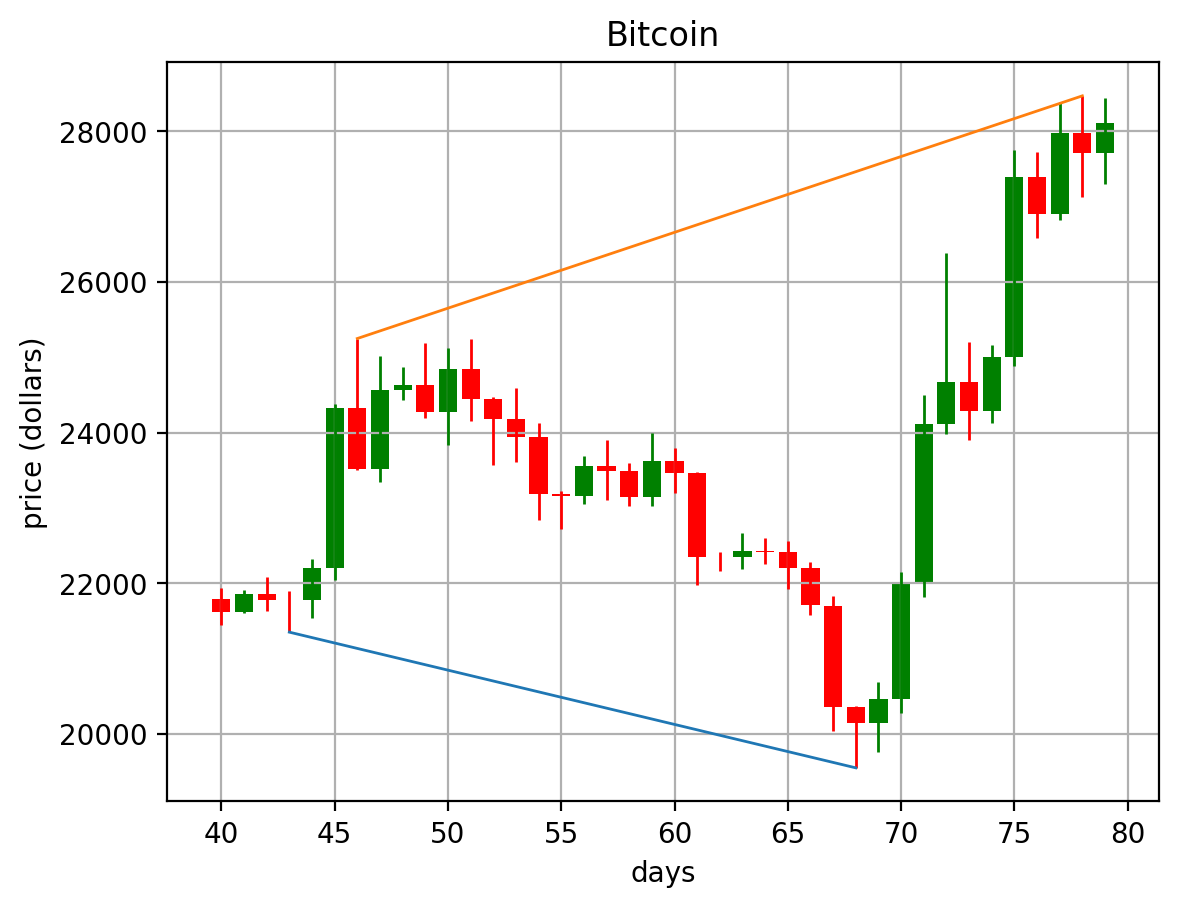

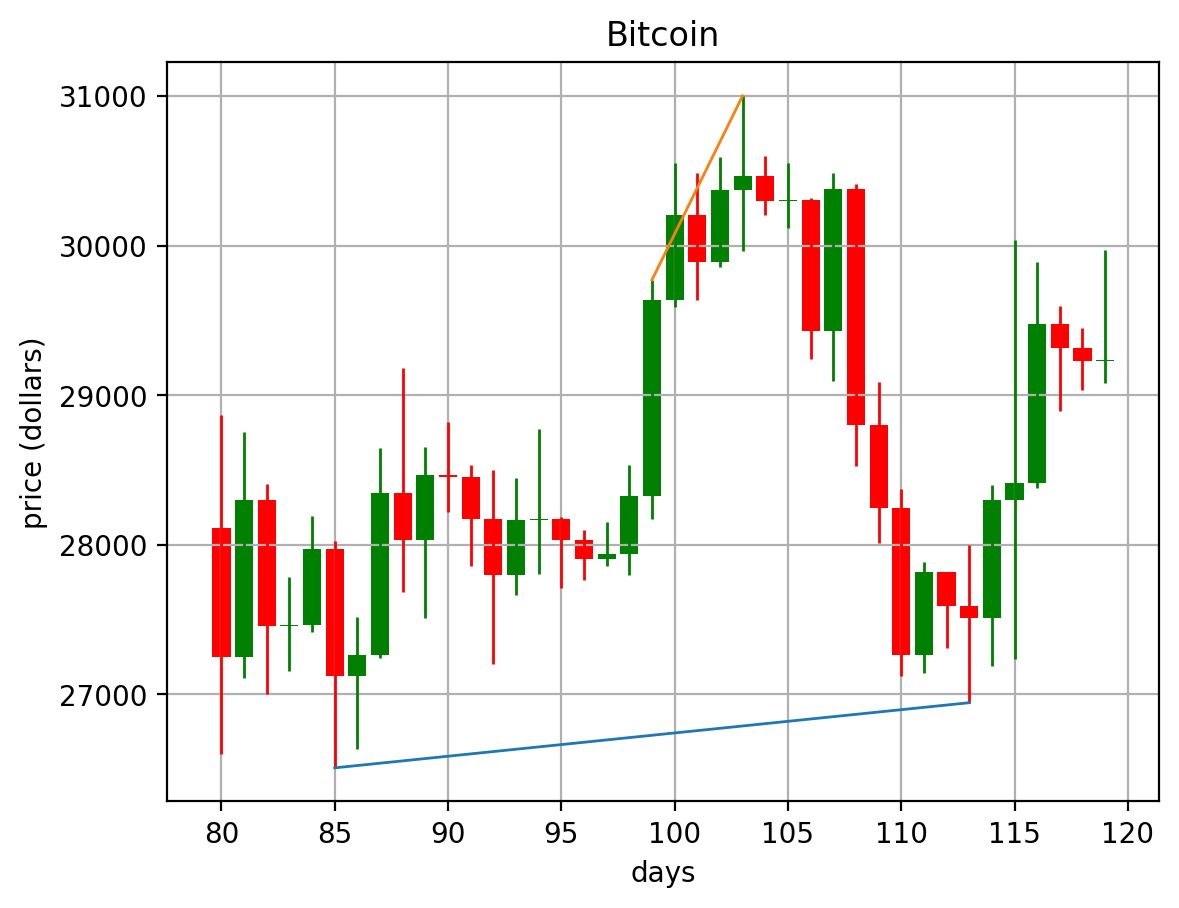

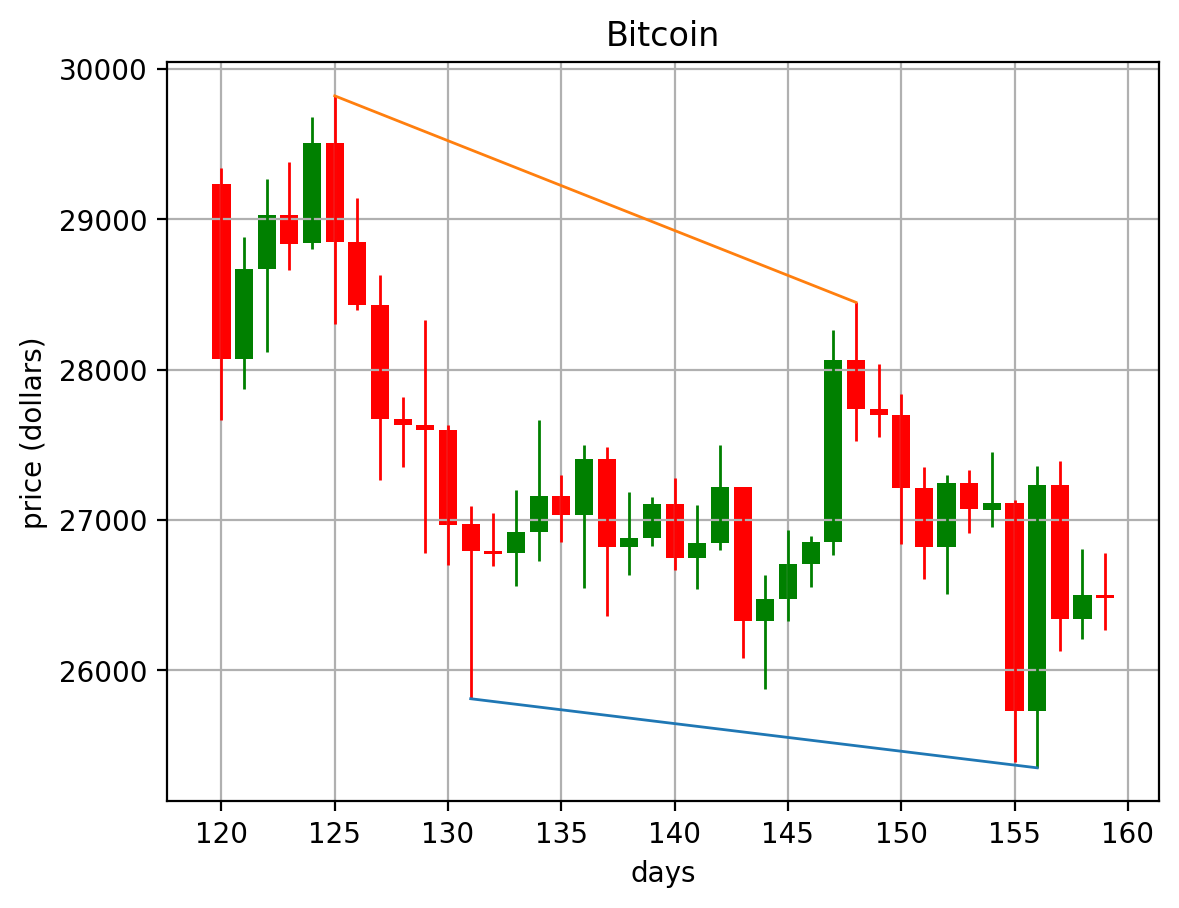

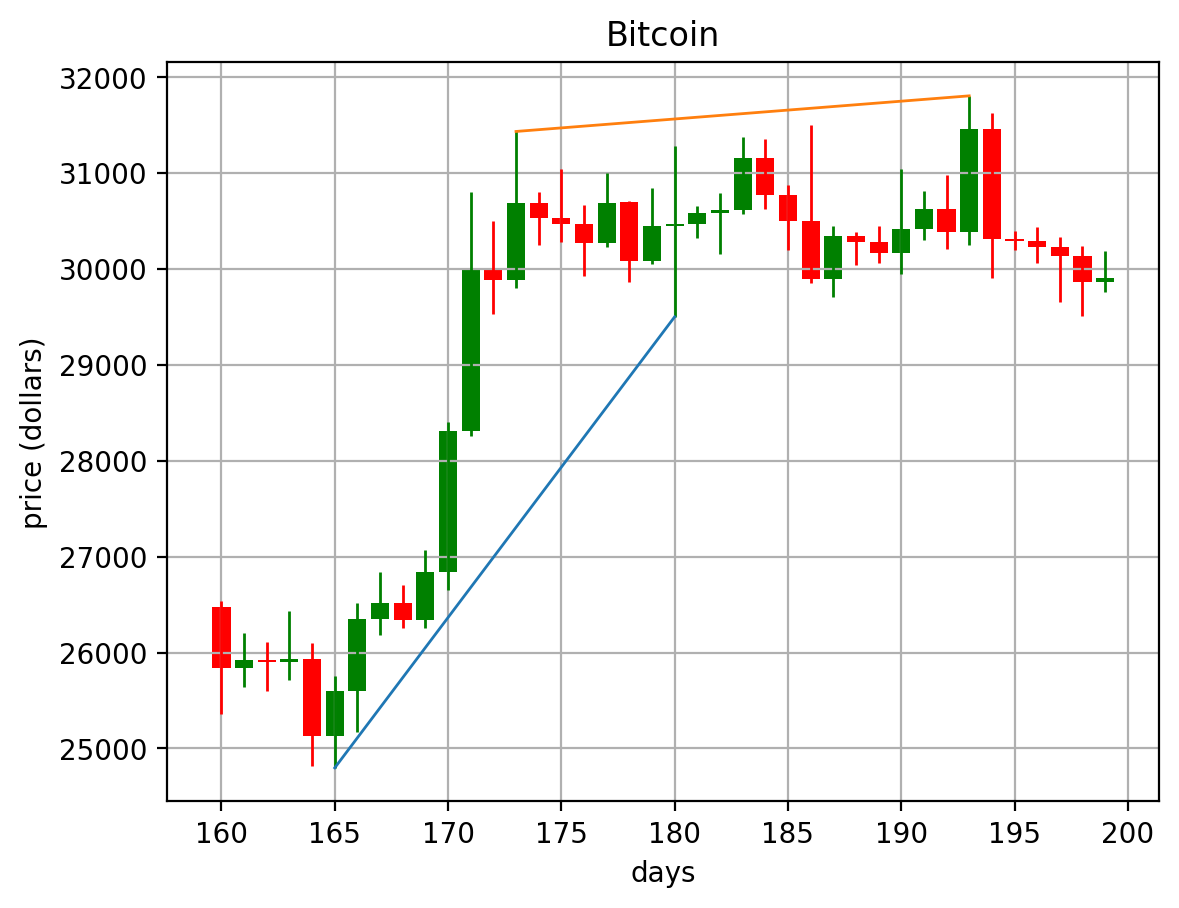

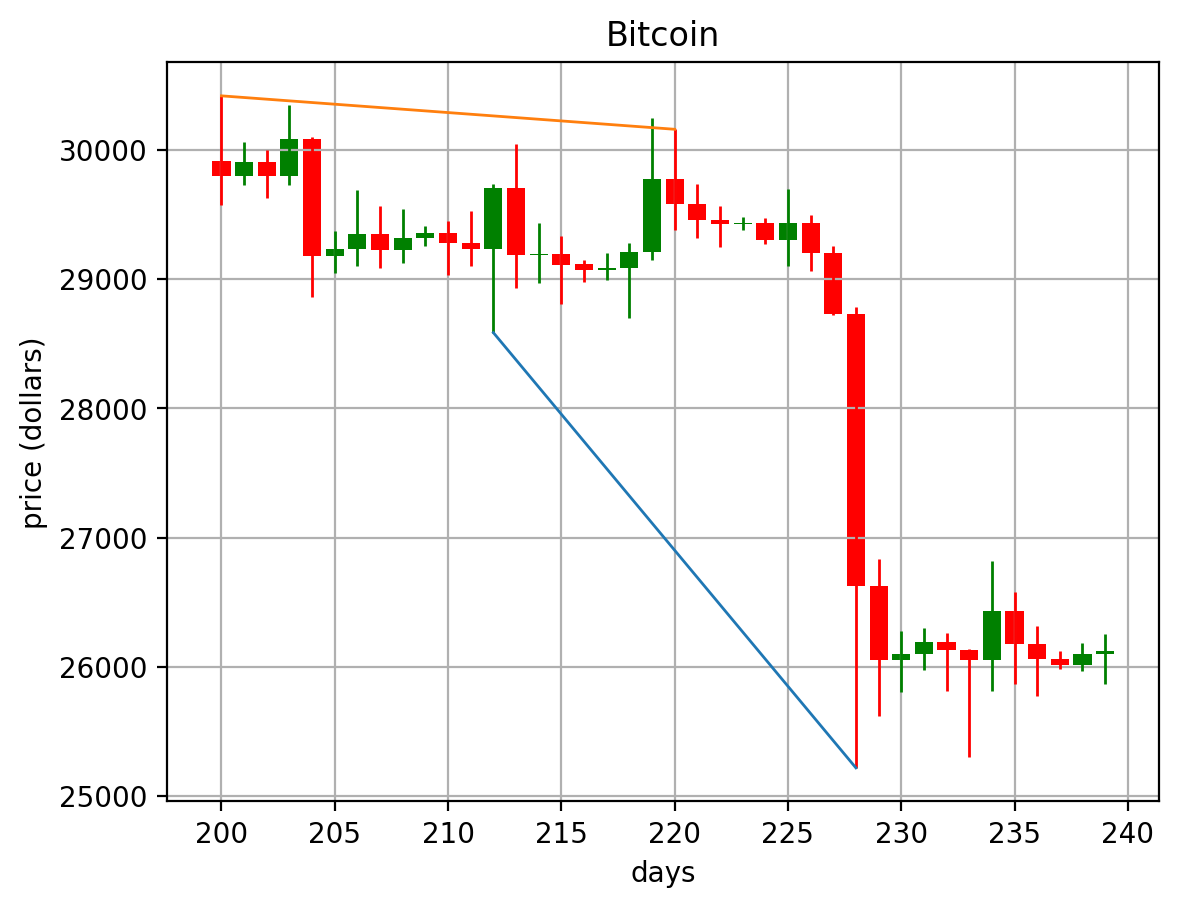

In [77]:
for x in range(40,220,40) :
    candleplot(df, list_of_draw_low_20, list_of_draw_high_20, list_of_interval_20, x_min = x , x_max = x + 40, filename= f"test_{x}-{x + 40}-0")


In [78]:
list_of_draw_low_40, list_of_draw_high_40, list_of_interval_40 = draw_list_creation(time_step=40, forecast_threshold=0)

print(list_of_interval_40)
print(list_of_draw_low_40)
print(list_of_draw_high_40)

[(0, 80), (40, 120), (80, 160), (120, 200), (160, 240), (200, 280), (240, 320), (280, 360), (320, 400)]
[((0, 16498.995356801075), (68, 19549.24001510092)), ((68, 19549.24001510092), (85, 26508.962046989647)), ((85, 26508.962046989647), (156, 25350.964103953644)), ((156, 25350.964103953644), (165, 24797.541202427936)), ((165, 24797.541202427936), (228, 25217.743564769567)), ((228, 25217.743564769567), (253, 24901.876589705866)), ((253, 24901.876589705866), (283, 26538.366487253)), ((283, 26538.366487253), (325, 35632.84428137093)), ((325, 35632.84428137093), (387, 38552.7417378765))]
[((32, 24255.02134413724), (78, 28472.789026939536)), ((78, 28472.789026939536), (103, 31001.132195779446)), ((103, 31001.132195779446), (125, 29820.88254401902)), ((125, 29820.88254401902), (193, 31804.76807399925)), ((193, 31804.76807399925), (200, 30417.33292141049)), ((200, 30417.33292141049), (274, 28580.51862760262)), ((274, 28580.51862760262), (318, 37979.77758405176)), ((318, 37979.77758405176), (3

In [79]:
filename = "lists_data_40.pickle" 
save_lists_with_pickle(list_of_draw_low_40, list_of_draw_high_40, list_of_interval_40, filename)

List successfully saved in the file :  lists_data_40.pickle


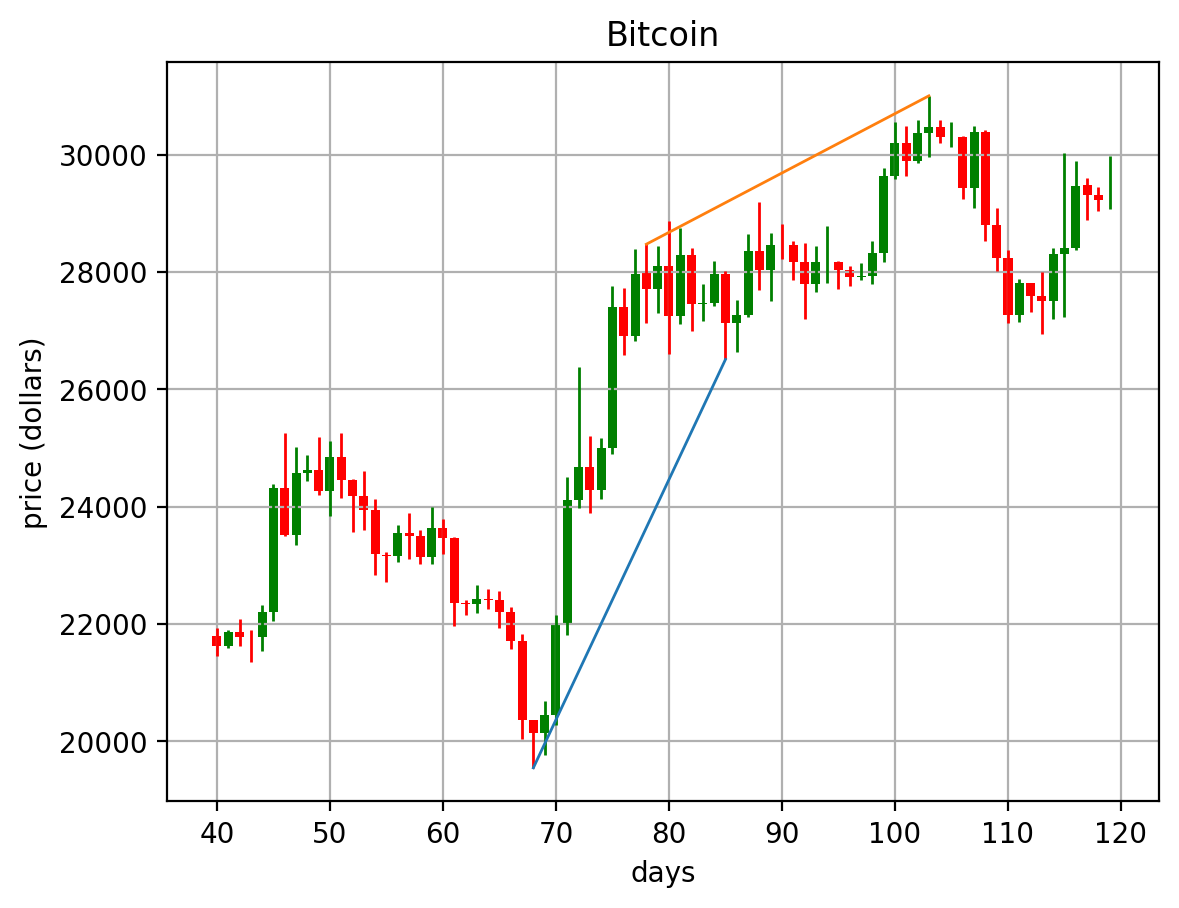

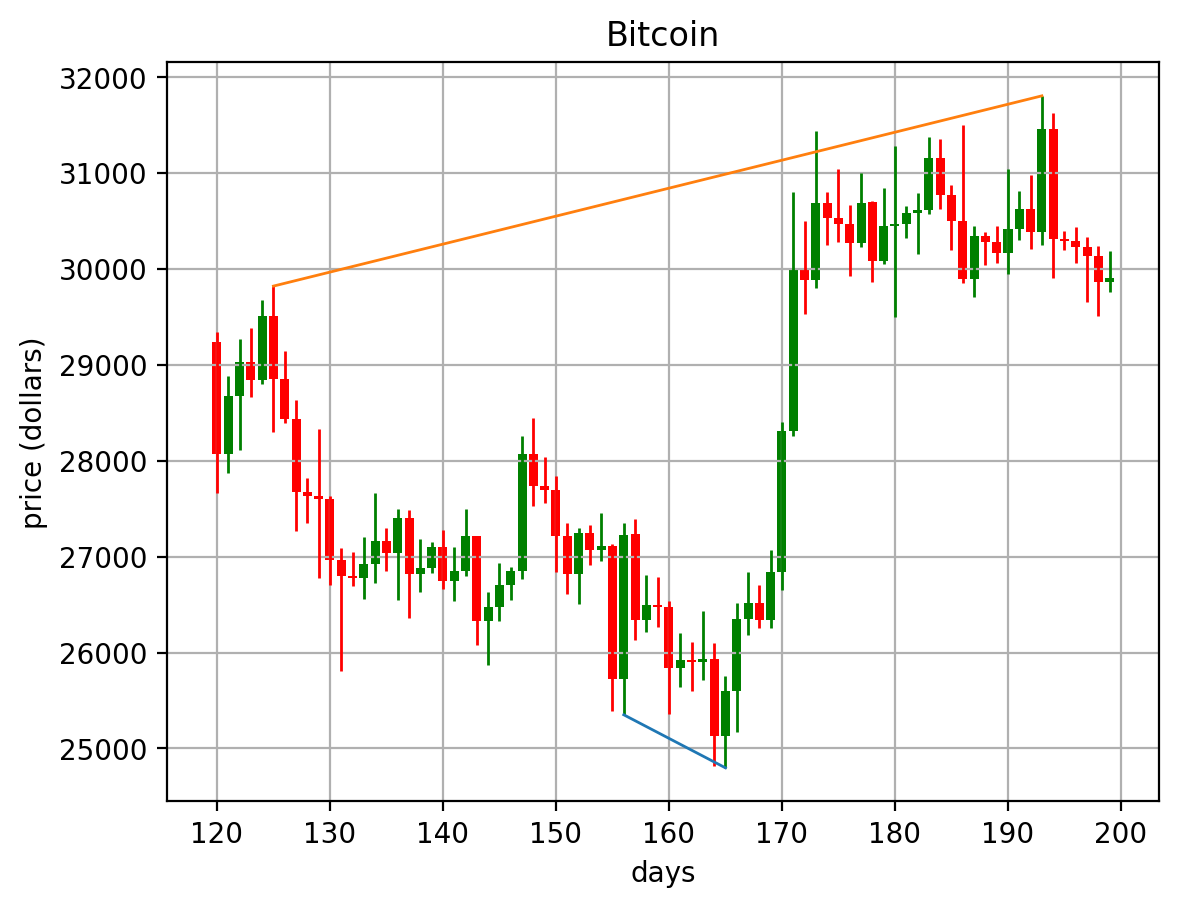

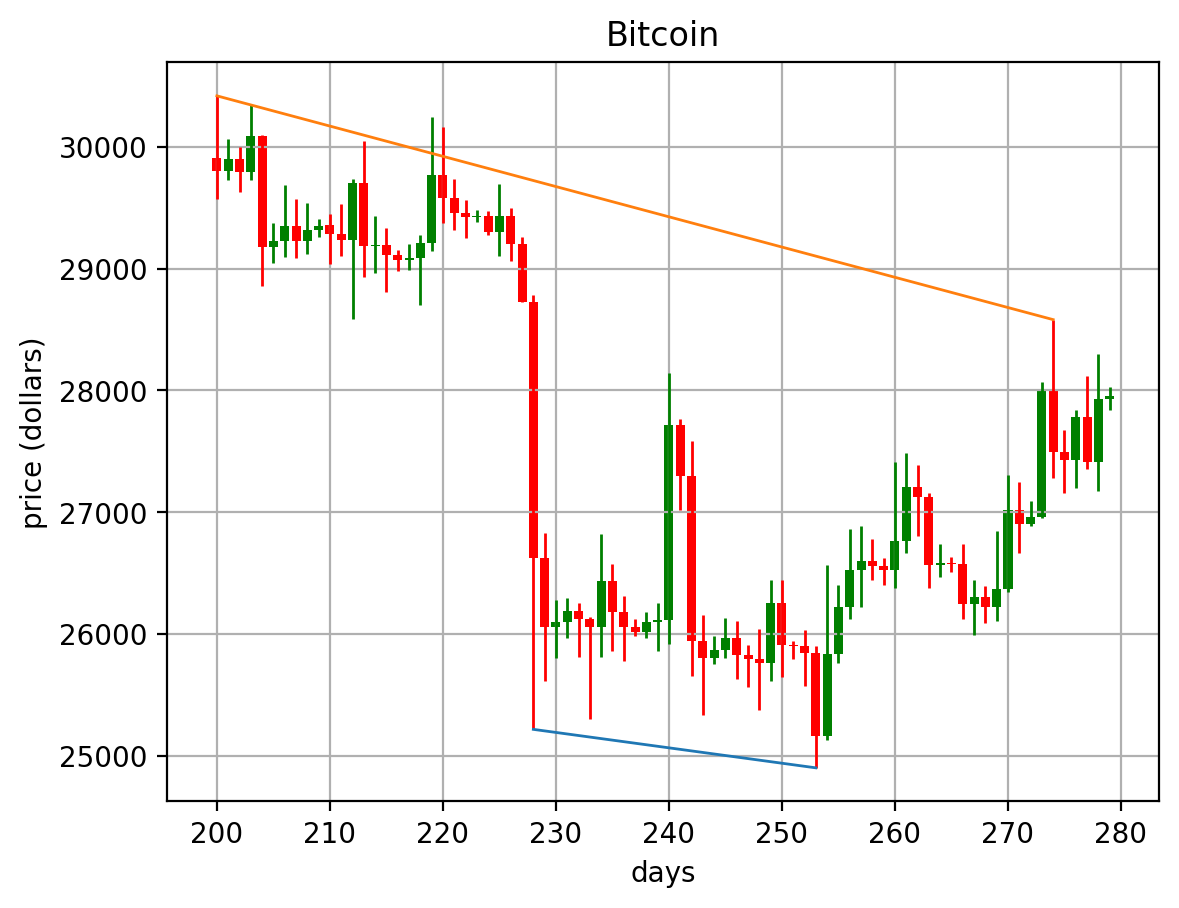

In [80]:
for x in range(40,220,80) :
    candleplot(df, list_of_draw_low_40, list_of_draw_high_40, list_of_interval_40, x_min = x , x_max = x + 80, filename= f"test_{x}-{x + 80}-0")


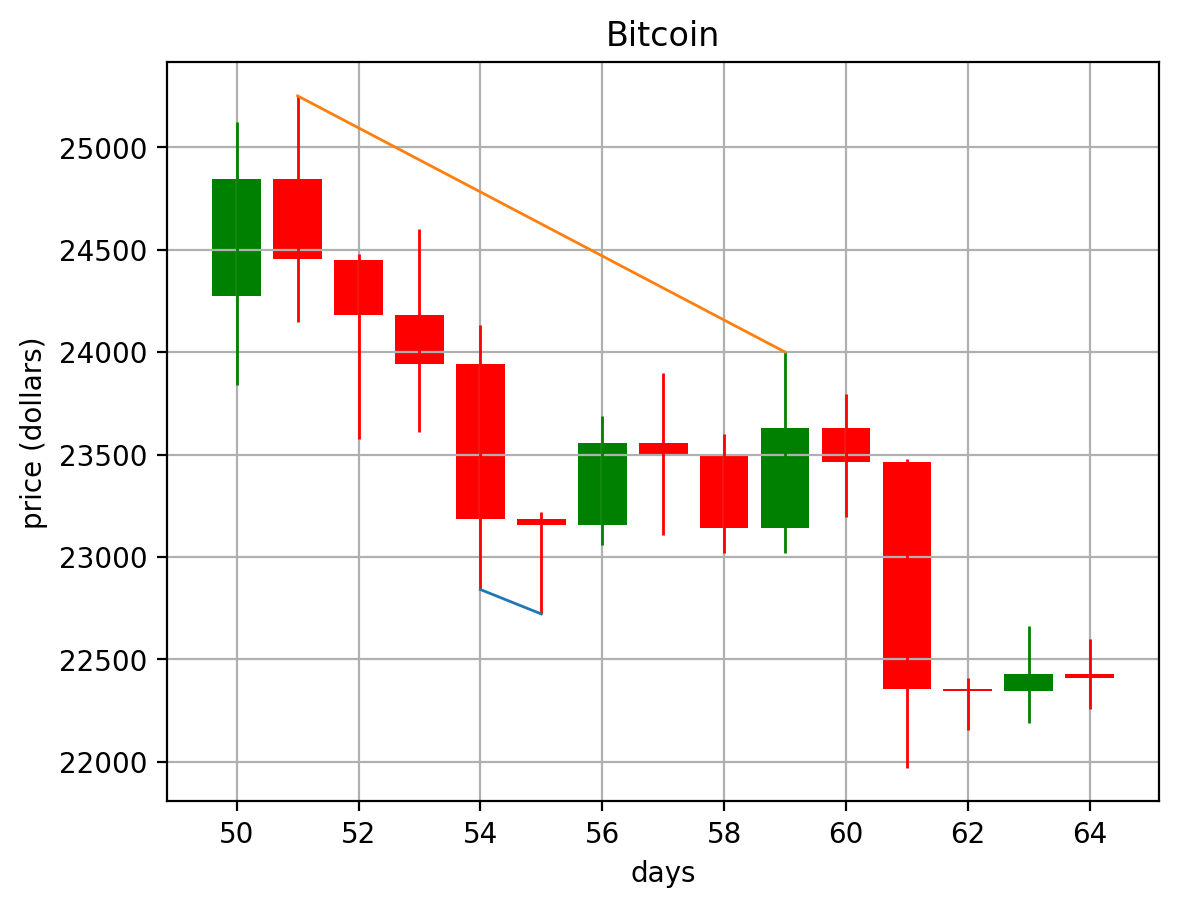

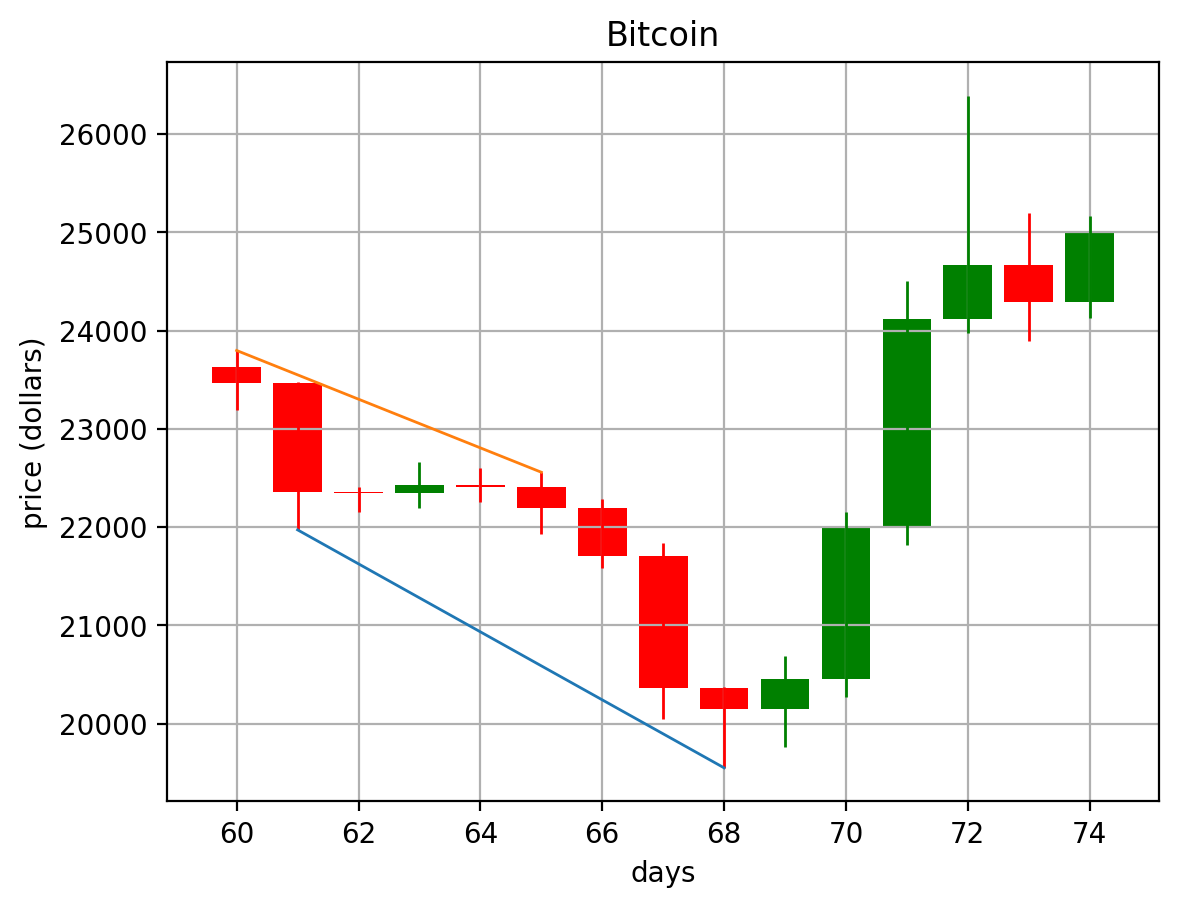

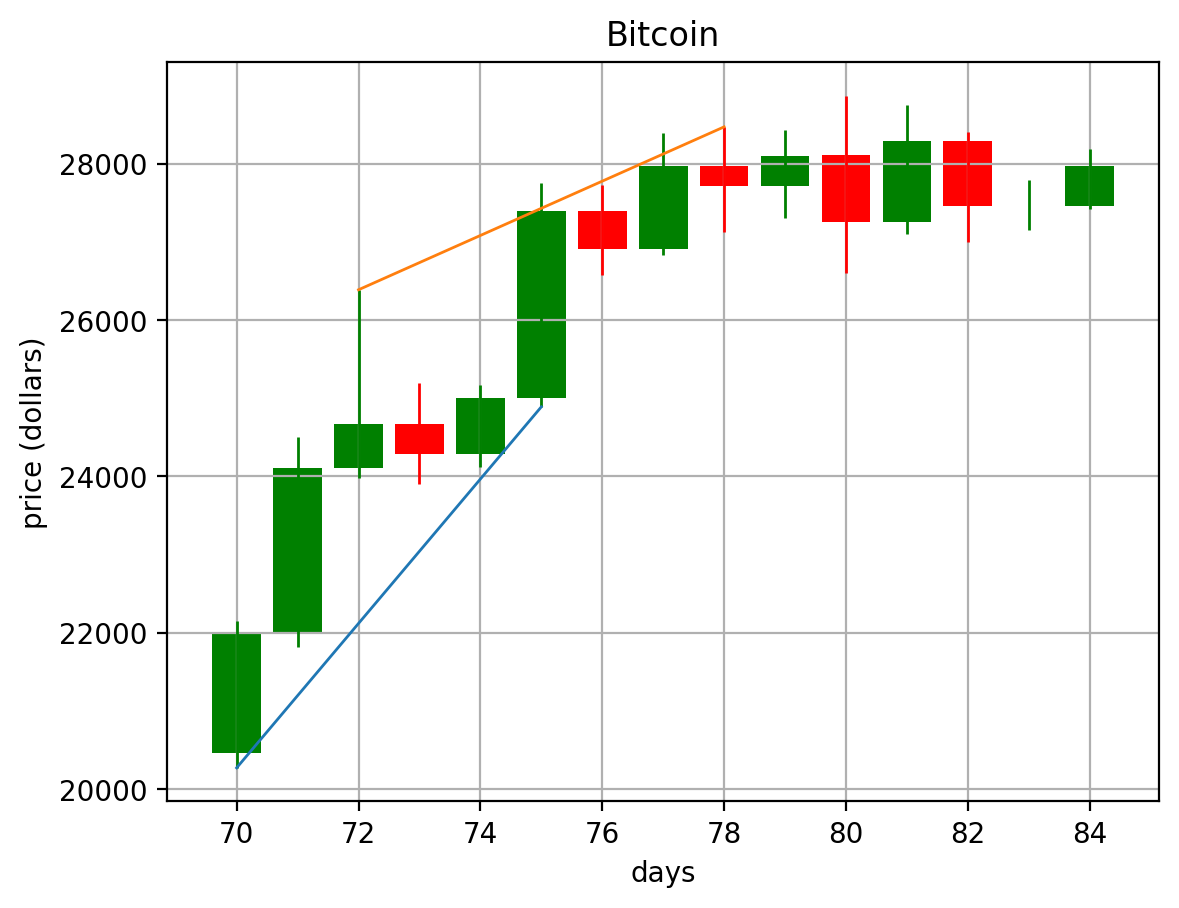

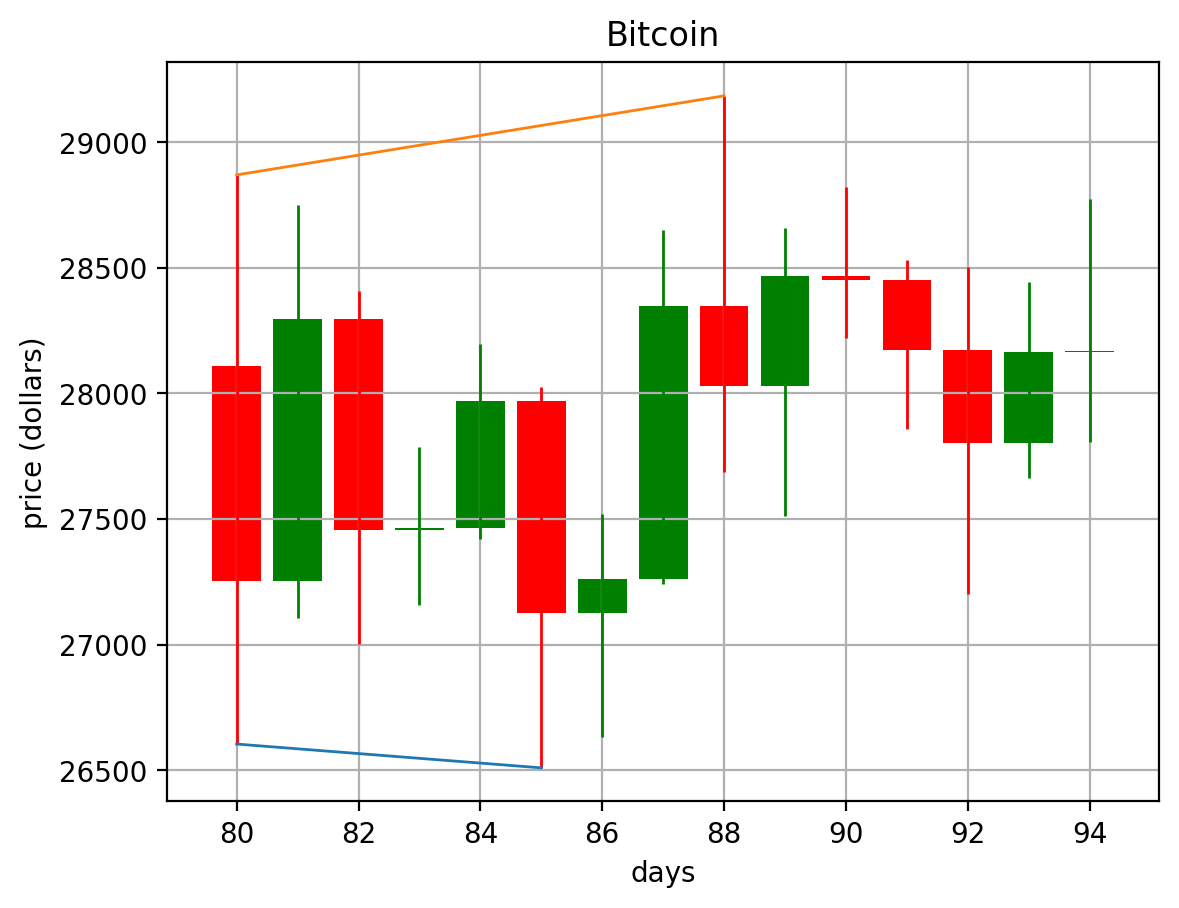

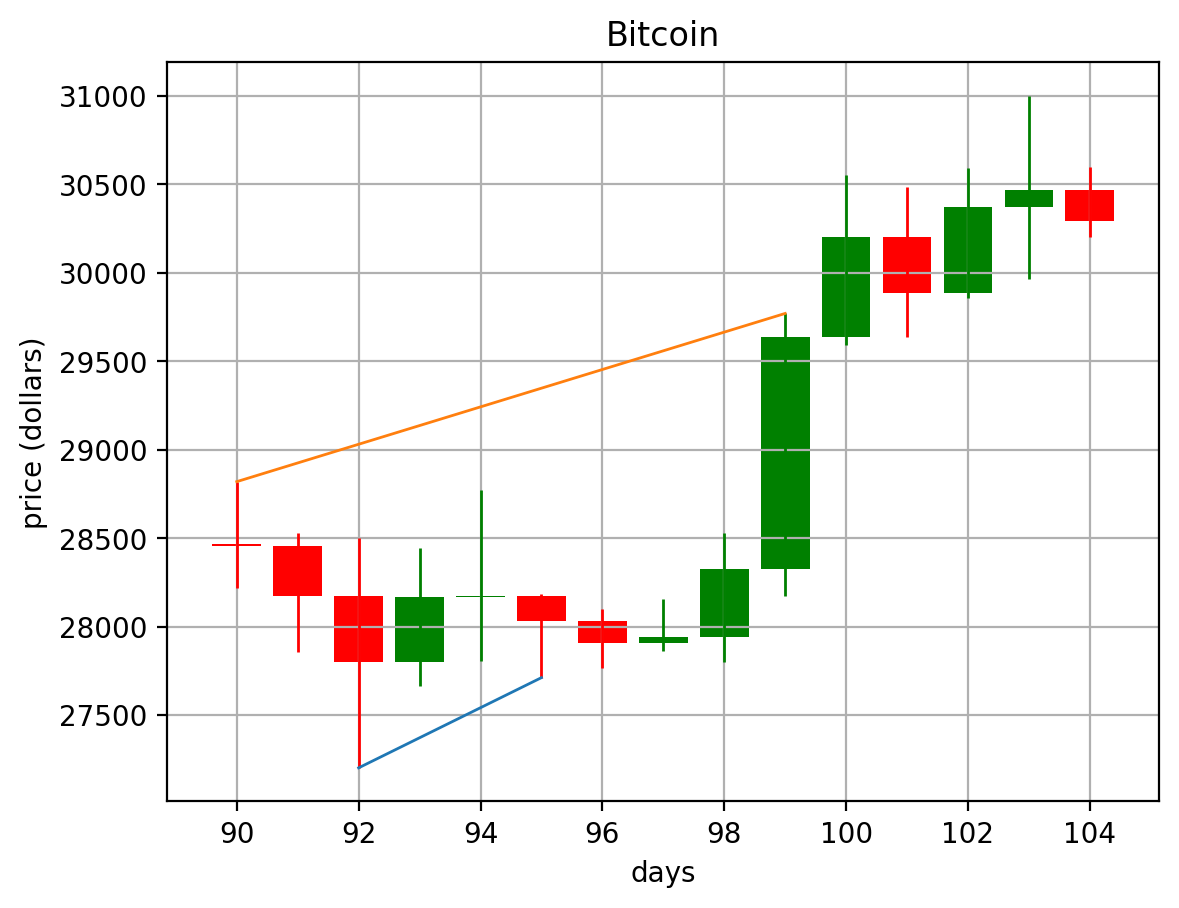

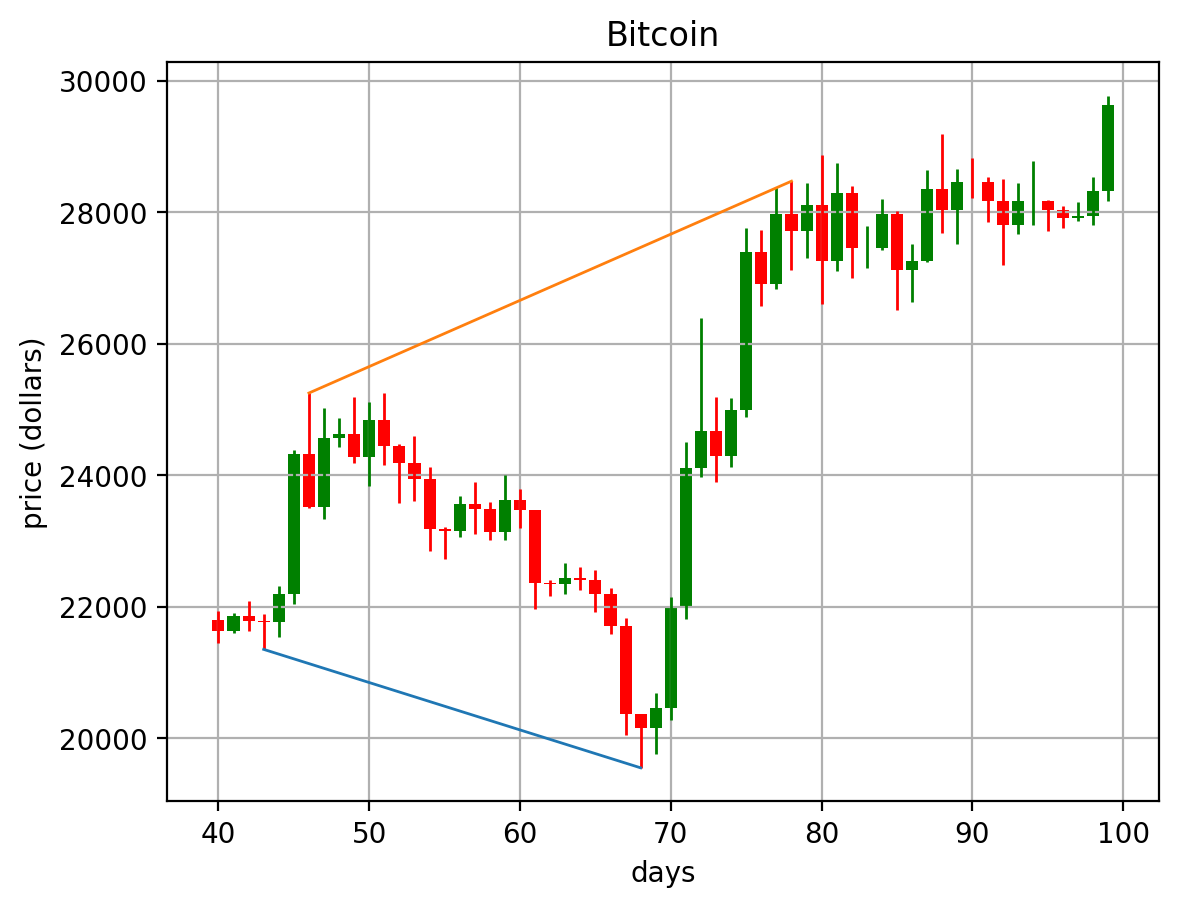

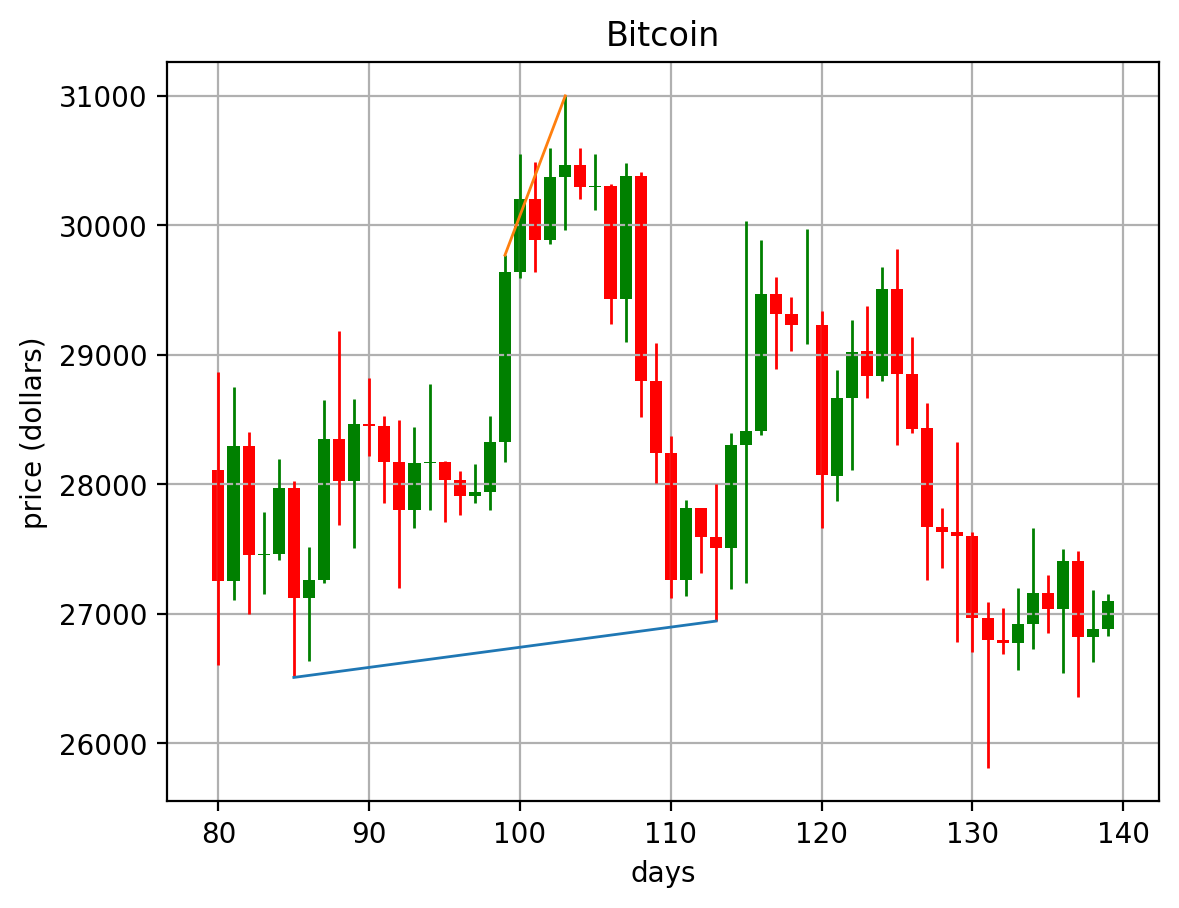

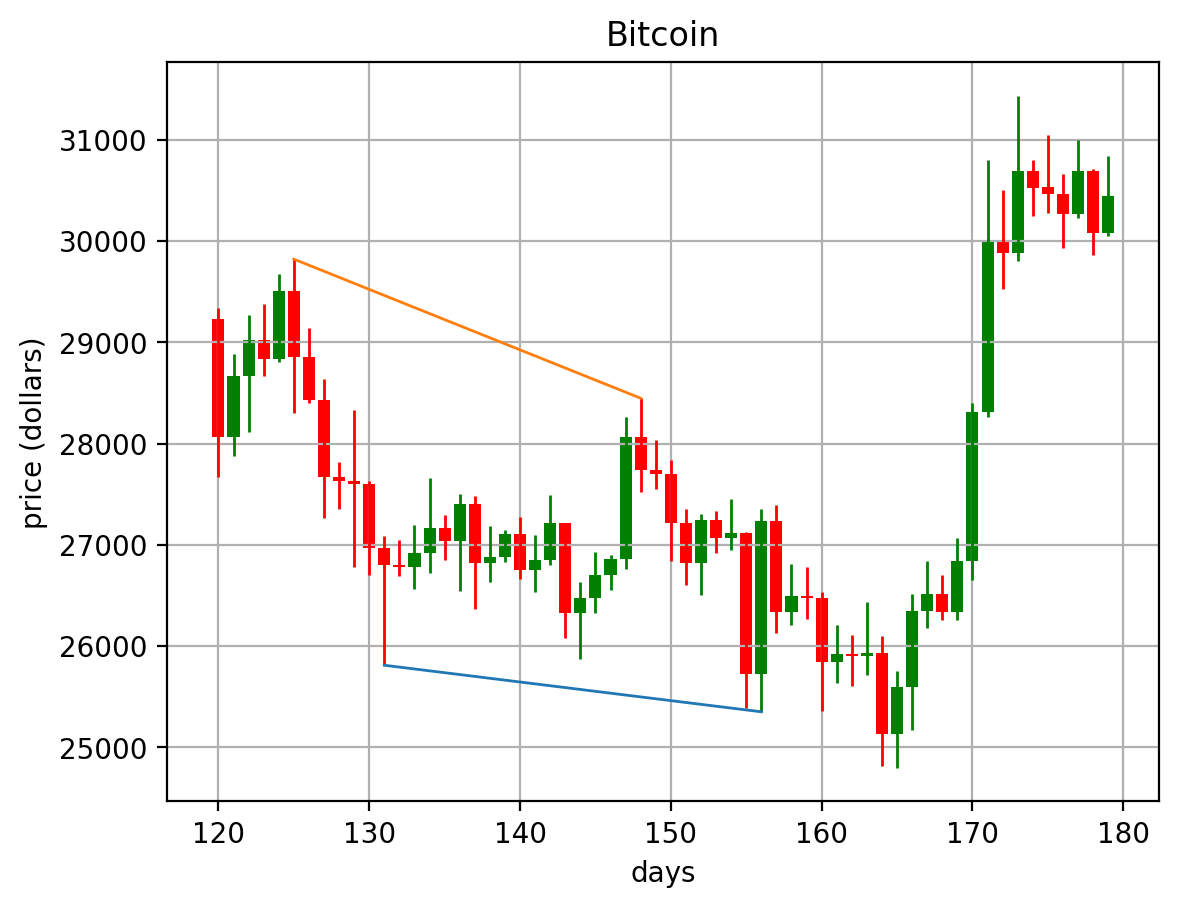

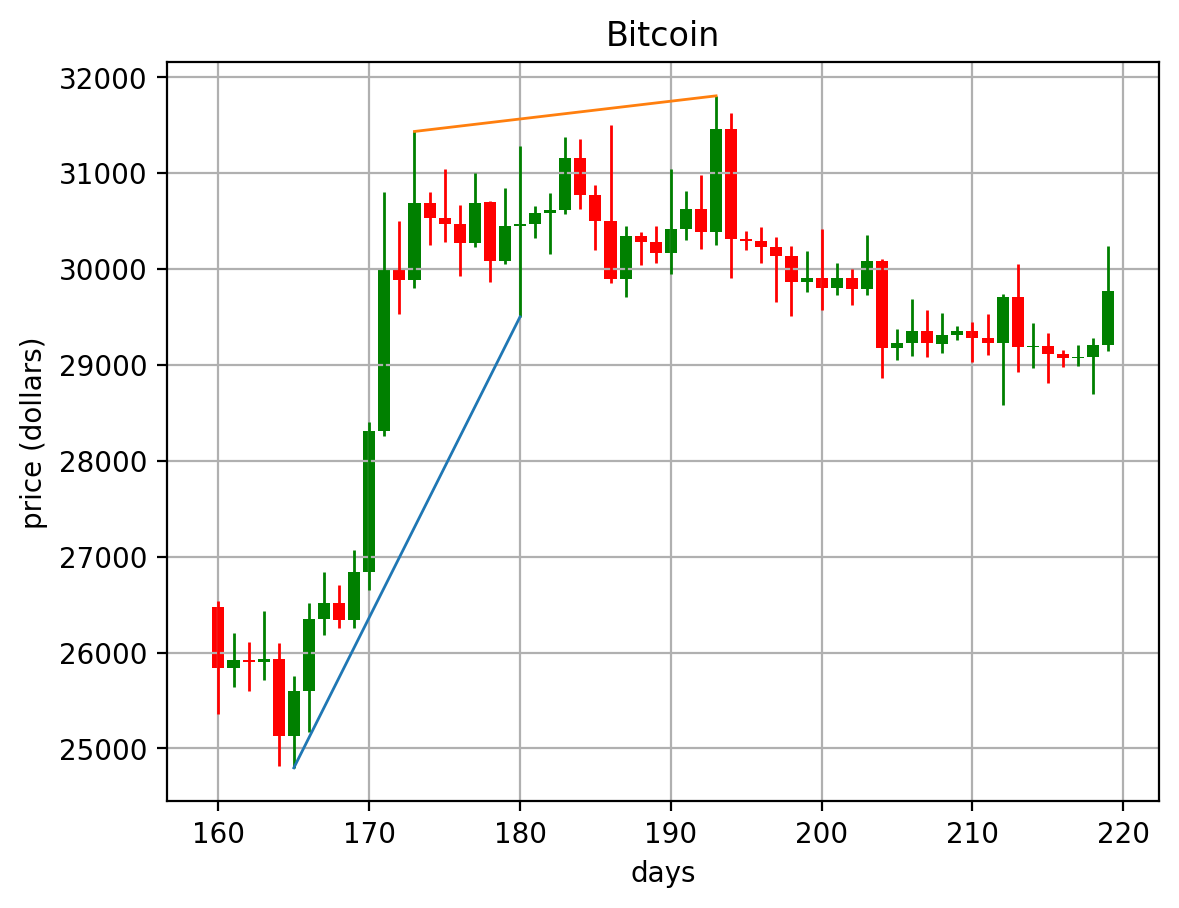

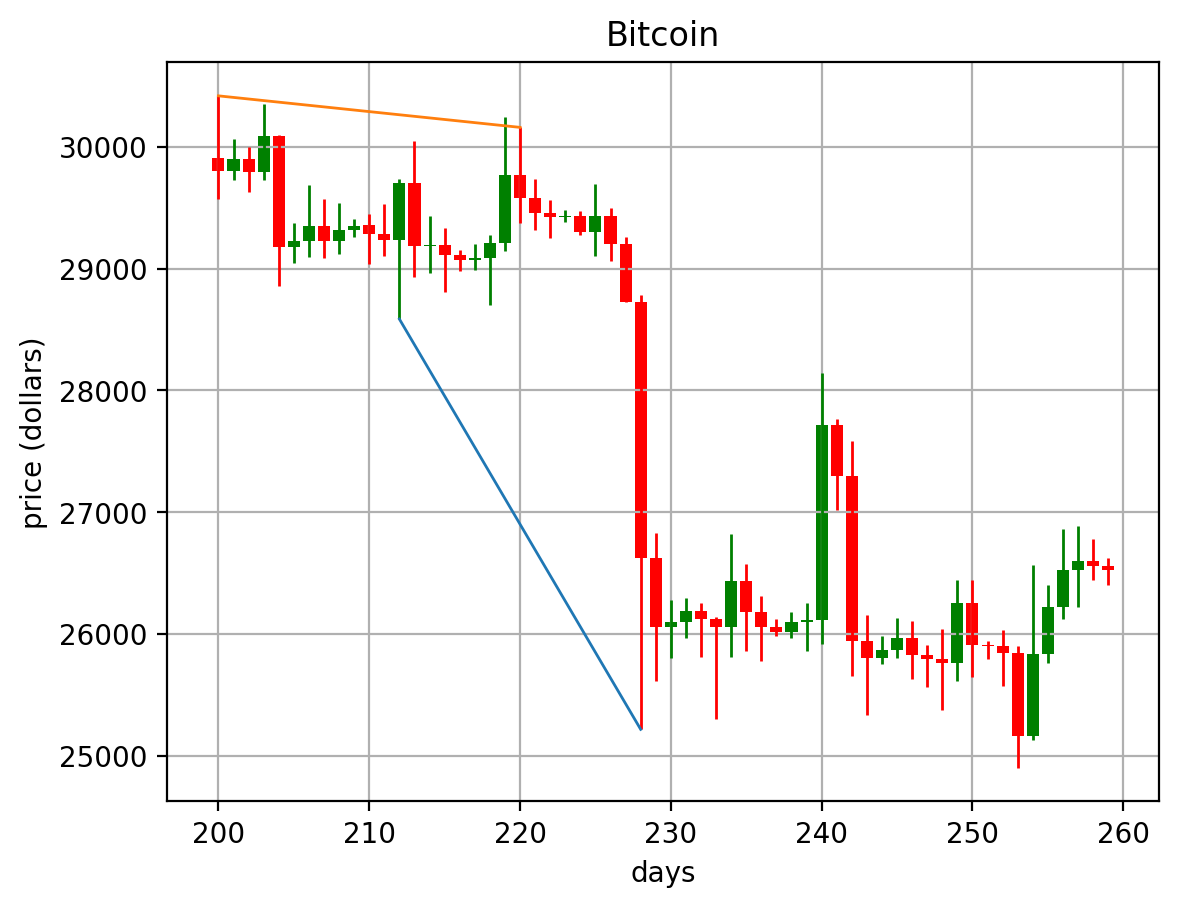

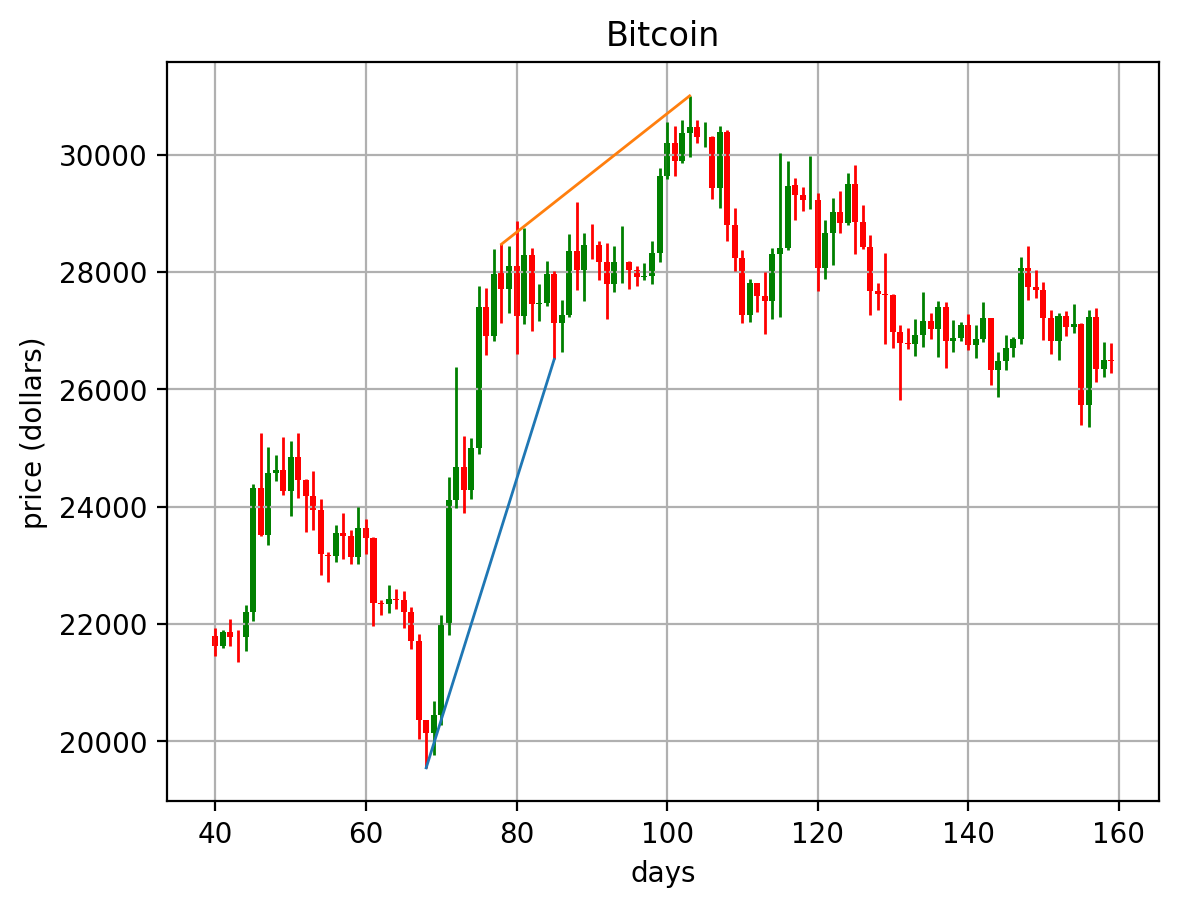

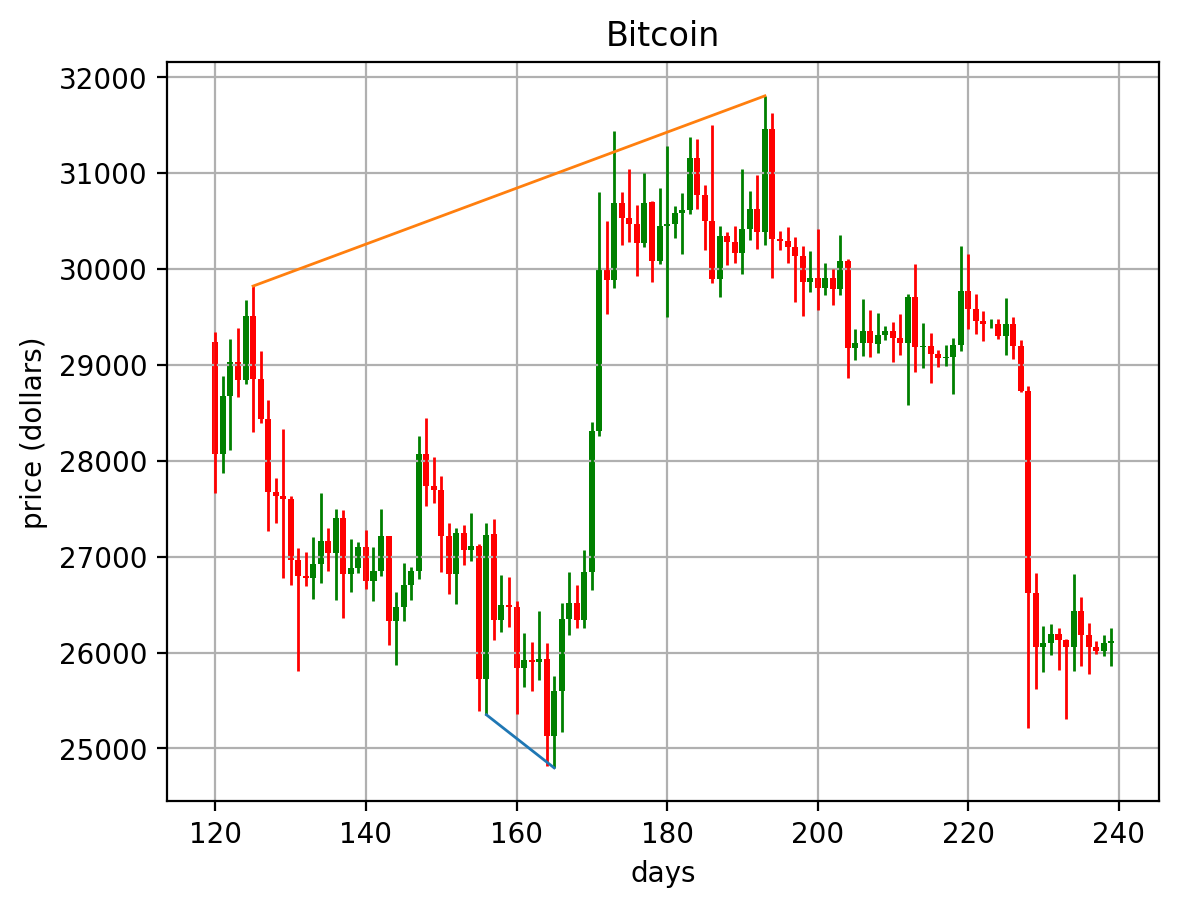

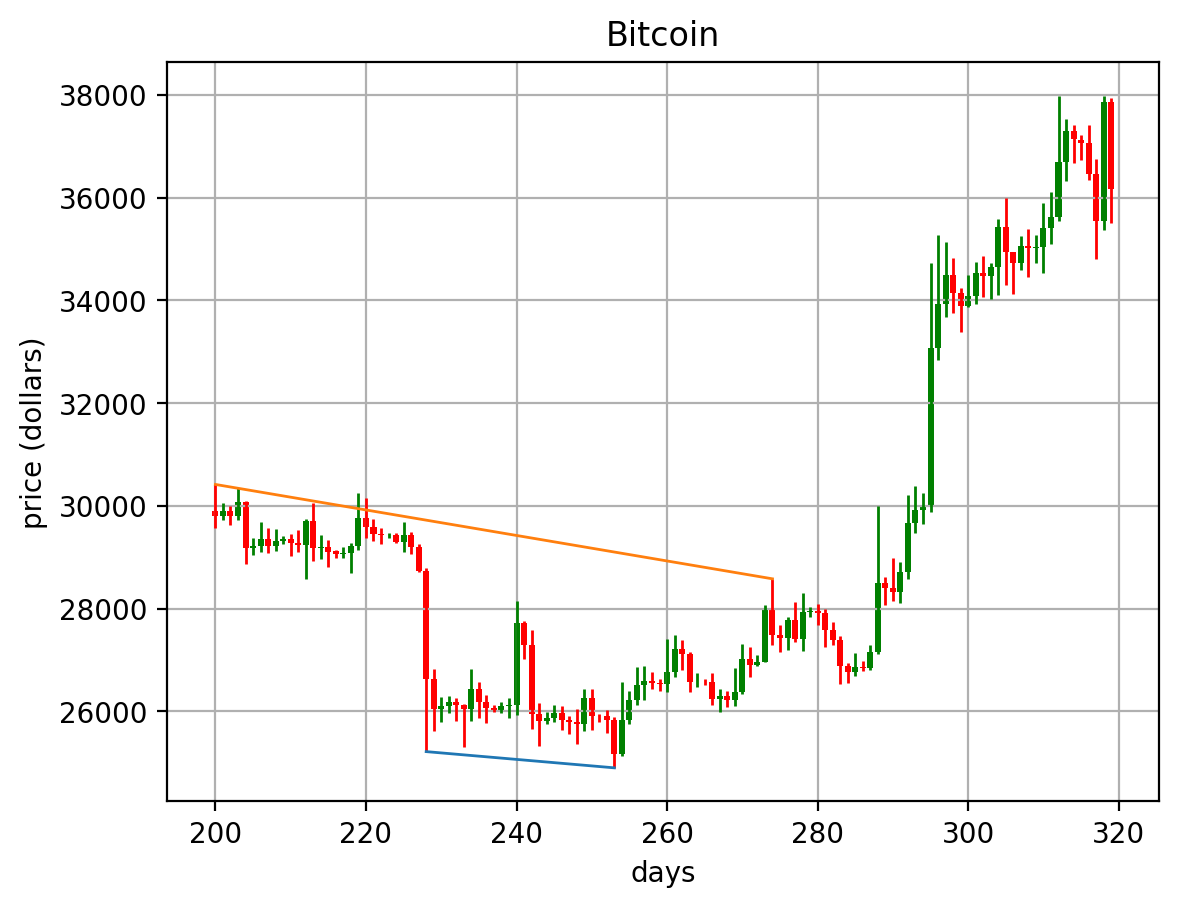

In [81]:
candleplot(df, list_of_draw_low_5, list_of_draw_high_5, list_of_interval_5, x_min = 50 , x_max = 65, filename= "test_50-60-5")
candleplot(df, list_of_draw_low_5, list_of_draw_high_5,list_of_interval_5, x_min = 60 , x_max = 75, filename= "test_60-70-5")
candleplot(df, list_of_draw_low_5, list_of_draw_high_5,list_of_interval_5, x_min = 70 , x_max = 85, filename= "test_70-80-5")
candleplot(df, list_of_draw_low_5, list_of_draw_high_5,list_of_interval_5, x_min = 80 , x_max = 95, filename= "test_80-90-5")
candleplot(df, list_of_draw_low_5, list_of_draw_high_5,list_of_interval_5, x_min = 90 , x_max = 105, filename= "test_90-100-5")

for x in range(40,220,40) :
    candleplot(df, list_of_draw_low_20, list_of_draw_high_20, list_of_interval_20, x_min = x , x_max = x + 60, filename= f"test_{x}-{x + 40}-20")

for x in range(40,220,80) :
    candleplot(df, list_of_draw_low_40, list_of_draw_high_40, list_of_interval_40, x_min = x , x_max = x + 120, filename= f"test_{x}-{x + 80}-40")

